<a href="https://colab.research.google.com/github/Elielkundai1/Extern_DataScience_workSample/blob/main/DowntownRestaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/Elielkundai1/Extern_DataScience_workSample/main/Chicago_downtown_restaurant.csv'

s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
print(df.head(10))

                  Restaurant                   details  rating reviewers  \
0        Flight Club Chicago           ·  · Restaurant     4.6      (1K)   
1                       Cite  ·  · American restaurant     3.5     (862)   
2         Roanoke Restaurant           ·  · Restaurant     4.3    (1.2K)   
3               The Dearborn             ·  · American     4.6    (2.7K)   
4    The Berghoff Restaurant               ·  · German     4.4    (3.5K)   
5                     Atwood         ·  · New American     4.2     (540)   
6                   The Gage             ·  · American     4.5    (3.5K)   
7         Cherry Circle Room             ·  · American     4.6     (766)   
8                Remington's             ·  · American     4.5    (1.5K)   
9  The Purple Pig Restaurant        ·  · Mediterranean     4.6    (5.1K)   

  Pricing                                           Location  Unnamed: 6  \
0      $$                                    111 W Wacker Dr         NaN   
1     $$$  

In [208]:
df.dtypes

Restaurant        object
details           object
rating           float64
reviewers         object
Pricing           object
Location          object
Unnamed: 6       float64
Unnamed: 7       float64
Unnamed: 8       float64
Unnamed: 9       float64
rllt__wrapped     object
dtype: object

In [209]:
rs = df['Restaurant']

In [210]:
rt = df['rating']
rv = df['reviewers']

In [211]:
df.isnull().sum()

Restaurant         2
details            2
rating             6
reviewers          6
Pricing           32
Location           2
Unnamed: 6       139
Unnamed: 7       139
Unnamed: 8       139
Unnamed: 9       139
rllt__wrapped     23
dtype: int64

In [212]:
dsc = df['rllt__wrapped']
df.isnull().sum()

Restaurant         2
details            2
rating             6
reviewers          6
Pricing           32
Location           2
Unnamed: 6       139
Unnamed: 7       139
Unnamed: 8       139
Unnamed: 9       139
rllt__wrapped     23
dtype: int64

In [213]:
df.dropna(inplace=True)

In [214]:
df.isnull().sum()

Restaurant       0.0
details          0.0
rating           0.0
reviewers        0.0
Pricing          0.0
Location         0.0
Unnamed: 6       0.0
Unnamed: 7       0.0
Unnamed: 8       0.0
Unnamed: 9       0.0
rllt__wrapped    0.0
dtype: float64

In [215]:
df['Restaurant'] = df['Restaurant'].astype('int')
df['details'] = df['details'].astype('int')
df['rating'] = df['rating'].astype('int')
df['reviewers'] = df['reviewers'].astype('int')
df['Pricing'] = df['Pricing'].astype('int')
df['Location'] = df['Location'].astype('int')
df['rllt__wrapped'] = df['rllt__wrapped'].astype('int')


In [19]:
df.dtypes

Restaurant         int64
details            int64
rating             int64
reviewers          int64
Pricing            int64
Location           int64
Unnamed: 6       float64
Unnamed: 7       float64
Unnamed: 8       float64
Unnamed: 9       float64
rllt__wrapped      int64
dtype: object

In [216]:
from plotnine.data import mpg
from plotnine import ggplot, aes, labs, geom_point
from plotnine.geoms.geom_bar import geom_bar
from plotnine.geoms.geom_smooth import geom_smooth

In [217]:
from pandas.io.formats.style_render import DataFrame
DataFrame.mean(rt)

4.356390977443609

In [218]:
DataFrame.std(rt)

0.35384326770449503

In [219]:
df.assign(highR =(rt >=4), lowR = (rt <4))

,Restaurant,details,rating,reviewers,Pricing,Location,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,rllt__wrapped,highR,lowR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_count : Removed 6 rows containing non-finite values.


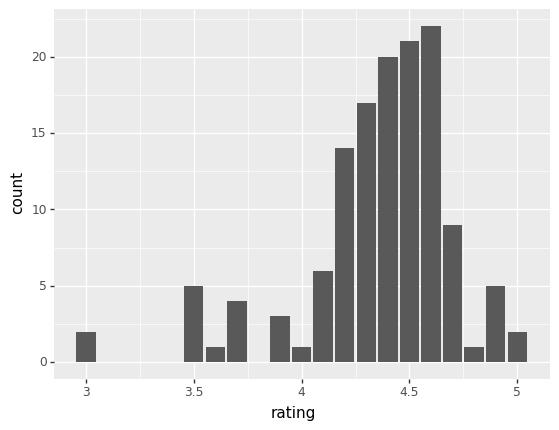

<ggplot: (8792880723369)>

In [220]:
(
    ggplot(df)+ aes(x=rt)+  geom_bar() 
)

In [236]:
df.nlargest(10,['Restaurant','rating'])

,Restaurant,details,rating,reviewers,Pricing,Location,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,rllt__wrapped


In [240]:
df.nlargest(10,['Restaurant','reviewers'])

,Restaurant,details,rating,reviewers,Pricing,Location,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,rllt__wrapped


In [251]:
df[((df['rating'] >= 4) & (df['rating'] <= 5))
      & (df['reviewers'] > 5000 )]

,Restaurant,details,rating,reviewers,Pricing,Location,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,rllt__wrapped


In [253]:
df.groupby('Restaurant')[['rating']].mean().head()

,rating


In [254]:
def rating_group(rating):
    if rating >= 4.0:
        return 'Good'
    elif rating >= 3.0:
        return 'Average'
    else:
        return 'Bad'

In [262]:
df['Rating_category'] = df['rating'].apply(rating_group)

In [264]:
df[['Restaurant','Location', 'Rating_category']].head(20)

,Restaurant,Location,Rating_category
